# Titanic - Machine Learning from Disaster

In this notebook, we're going to analyse the famous Titanic dataset from Kaggle (https://www.kaggle.com/c/titanic/data). 

we're going to do some exploratory analysis at this stage and then supervised machine learning.

Some questions we're going to answer:

    - What were the demographics of the Titanic passengers, including details such as age, gender, and class?
    - How does the deck allocation of passengers correlate with their class status on the Titanic?
    - What were the origins of the Titanic passengers, i.e., where did they embark from?
    - What was the distribution of passengers in terms of traveling alone versus with family members?
    - Which factors played a significant role in determining the survival of passengers during the Titanic sinking?

### Meta data:

- survival: Survival (0 = No, 1 = Yes)
- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Sex	
- Age: Age (years)	
- sibsp: # of siblings / spouses aboard the Titanic	
- parch: # of parents / children aboard the Titanic	
- ticket: Ticket number	
- fare: Passenger fare	
- cabin: Cabin number	
- embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [46]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
# Loading data
nombreArchivo1 = 'train.csv' # nombre del archivo del dataset
nombreArchivo2 = 'test.csv' 
nombreArchivo3 = 'gender_submission.csv' 
url_datos1 = f'C:/Users/mar27/OneDrive/Documentos/CURSOS/DATA SCIENCE KSCHOOL/00_PRACTICING/titanic/data/{nombreArchivo1}'
url_datos2 = f'C:/Users/mar27/OneDrive/Documentos/CURSOS/DATA SCIENCE KSCHOOL/00_PRACTICING/titanic/data/{nombreArchivo2}'
url_datos3 = f'C:/Users/mar27/OneDrive/Documentos/CURSOS/DATA SCIENCE KSCHOOL/00_PRACTICING/titanic/data/{nombreArchivo3}'

In [48]:
train_df = pd.read_csv(url_datos1)
test_df = pd.read_csv(url_datos2)
gen_sub_df = pd.read_csv(url_datos3)

## 1 - Exploratory Data Analysis

### 1.1 - First view of the data sets

In [49]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
gen_sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We already can see here there are a lot of missing data from the Cabin column.

Other info seems to be complete, except for some Age entries.

In [91]:
# Check for missing values in the DataFrame
missing_values = train_df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
Alone            0
dtype: int64


In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Same thing happens in the test dataset.

In [54]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Examining the Survived column, a value of 1 indicates survival, whereas a value of 0 signifies death. Therefore, observing the mean, it suggests that approximately 38% of individuals survived the Titanic sinking.

### 1.2 - First visualiations of raw data

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mar27\App

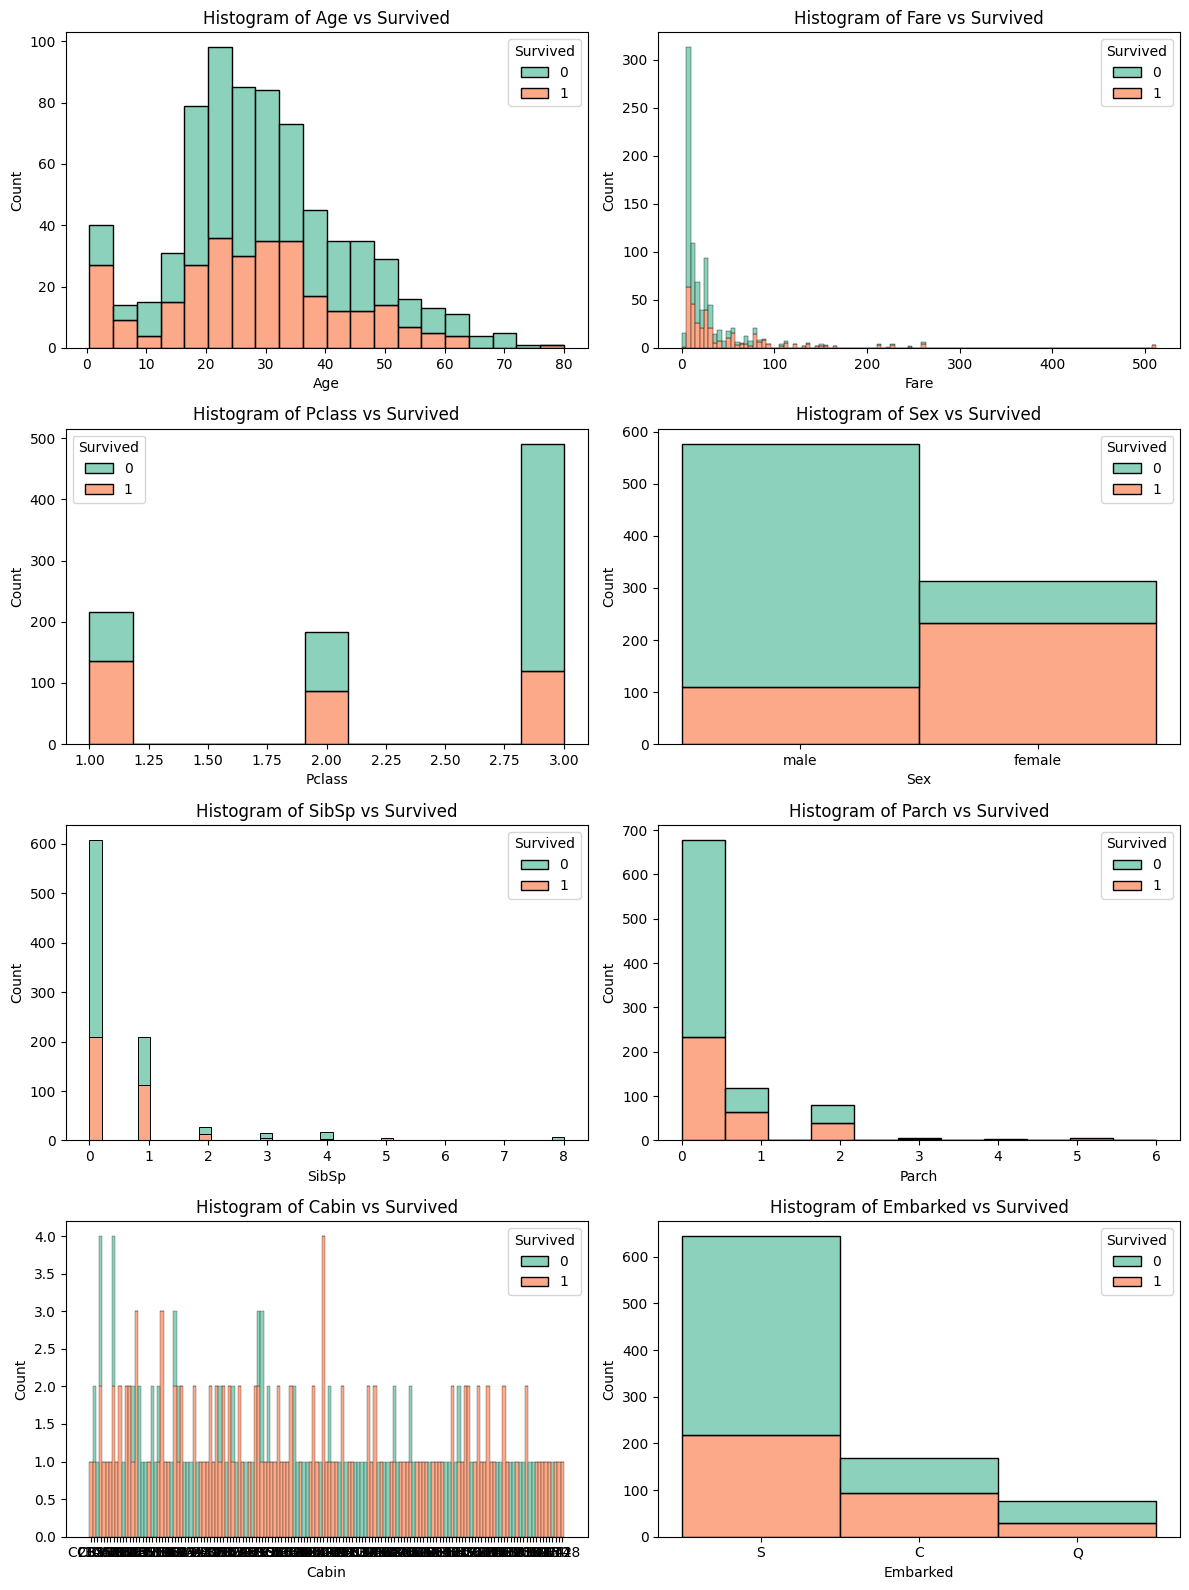

In [55]:
# Plotting an histogram to see how different independent variables influences the dependent variable (survived)
independent_variables = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']

# Calculate the number of rows needed for the grid
num_rows = len(independent_variables) // 2
if len(independent_variables) % 2: num_rows += 1

# Create the grid
plt.figure(figsize=(12, 4 * num_rows))
for i, var in enumerate(independent_variables):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(data=train_df, x=var, hue='Survived', multiple="stack", palette='Set2')
    plt.title(f'Histogram of {var} vs Survived')

plt.tight_layout()
plt.show()

### 1.3 - Answering questions

#### What were the demographics of the Titanic passengers, including details such as age, gender, and class?

Let's see some demographical information about the passengers.

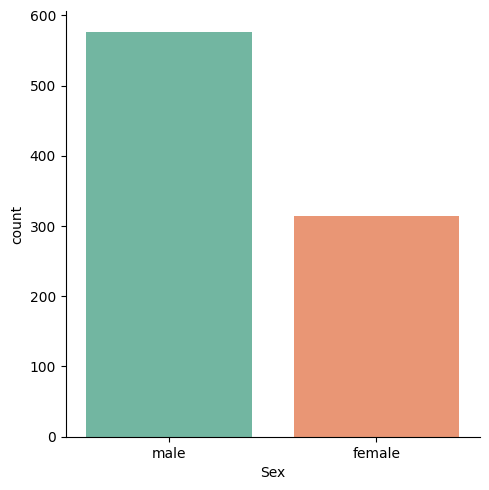

In [56]:
# Creating a factorplot, charting the number of male and female passengers
sns.catplot(x='Sex',data=train_df,kind='count',palette='Set2')

We can see there were considerably more male passengers onboard.

Let's take a look at how the passengers were divided among different classes.

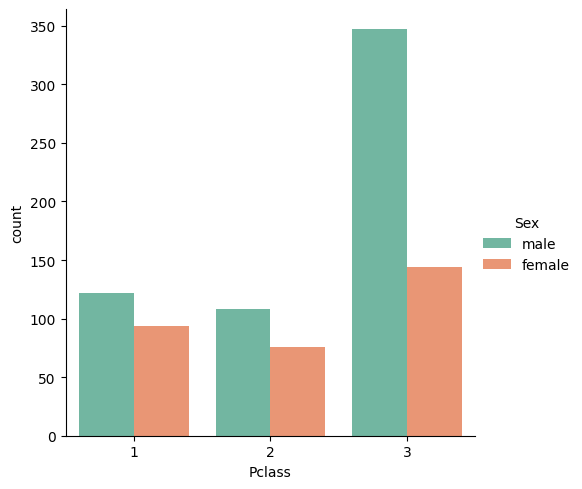

In [57]:
sns.catplot(x='Pclass',data=train_df,hue='Sex',kind='count', palette='Set2')

Before drawing any conclusions from the factor plot, it's prudent to categorize the passengers into three groups: male, female, and children.

In [58]:
# A function to determine whether an individual is male, female, or a child.

def man_woman_child(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

# Utilizing Pandas' apply function to generate a fresh column named "Person".

train_df['Person'] = train_df.apply(man_woman_child,axis=1)

In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [60]:
# Getting the actual counts
print(train_df['Person'].value_counts())

Person
male      537
female    271
child      83
Name: count, dtype: int64


Now, let's construct a factor plot to examine the distribution of males, females, and children across various classes.

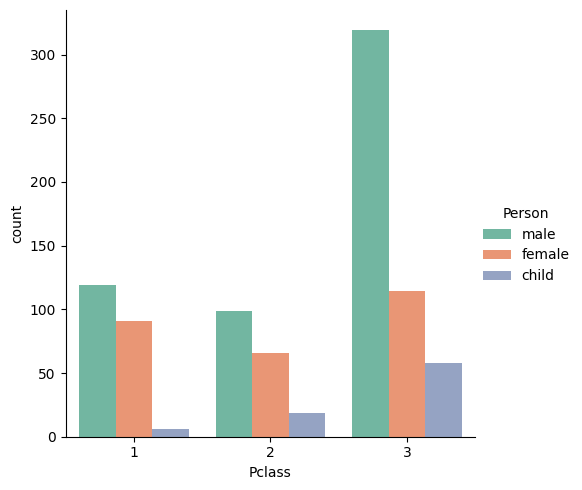

In [61]:
sns.catplot(x='Pclass',data=train_df,hue='Person',kind='count',palette='Set2')

It's noteworthy that there are significantly more male passengers than females or children in the third class compared to any other class. This observation will be pivotal for our subsequent analysis.

We can promptly generate a histogram from the dataset to examine the distribution of passengers across different age groups.

<AxesSubplot: >

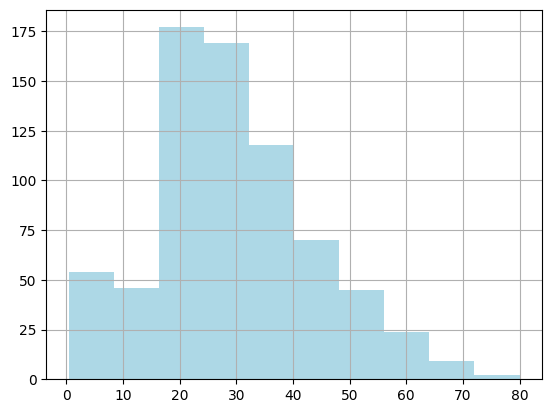

In [62]:
# Create a histogram of 'Age' with blue bars
train_df['Age'].hist(color='lightblue')

Let's explore how the age distribution varies across different classes. We'll employ Seaborn's FacetGrid for this task.

_(FacetGrid is a feature in the seaborn (sns) Python library that allows you to create a grid of subplots based on the unique values of one or more categorical variables. It's particularly useful for visualizing relationships between variables across different subsets of the data.)_

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

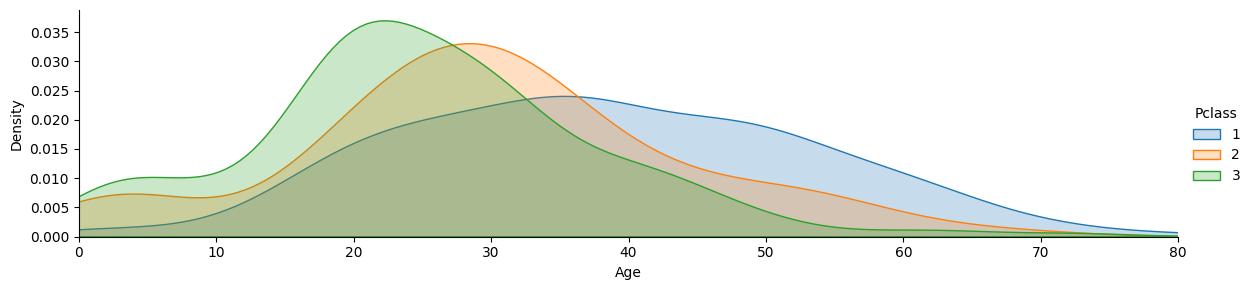

In [66]:
# Create a FacetGrid object. 'hue' parameter colors the plot elements by 'Pclass'. 'aspect' parameter controls the width of each facet.
fig = sns.FacetGrid(train_df,hue='Pclass',aspect=4)

# Map a kernel density estimate plot to the FacetGrid. 'Age' is plotted on the x-axis. 'shade' parameter fills the area under the KDE curve.
fig.map(sns.kdeplot,'Age',shade=True)

# Get the maximum age in the 'Age' column
oldest = train_df['Age'].max()

# Set the x-axis limit from 0 to the maximum age
fig.set(xlim=(0,oldest))

# Add a legend to the plot
fig.add_legend()

It's evident that first-class passengers were predominantly from middle-age groups, with minimal representation of children. On the other hand, second and third-class passengers comprised more children, with a comparatively smaller proportion of older individuals.

c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

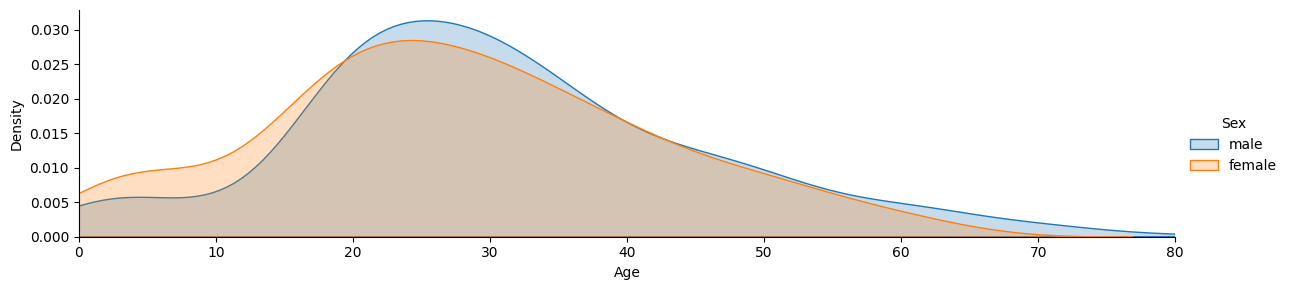

In [67]:
fig = sns.FacetGrid(train_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = train_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

The age distribution appears to be less diverse when considering male and female passengers. However, it's notable that there are more younger females than younger males.

#### How does the deck allocation of passengers correlate with their class status on the Titanic?

Since we're conducting an open-ended analysis, let's investigate whether individuals from higher classes were allocated cabins on upper decks or levels of the ship.

In [68]:
# Given the substantial amount of missing cabin data, we'll proceed by dropping it for this particular section of analysis.

deck_df = train_df.dropna(axis=0)
deck_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female


To determine the deck a passenger was assigned to, we can extract the first character from the cabin information. Since the cabin number typically follows a format where the first character represents the deck, we can create a Python method to extract this character.

In [71]:
#Grabbing the deck from the cabin numbers
def get_deck(passenger):
    cabin = passenger['Cabin']
    return cabin[0]

In [72]:
deck_df['deck']=deck_df.apply(get_deck,axis=1)


C:\Users\mar27\AppData\Local\Temp\ipykernel_19116\2674826531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck_df['deck']=deck_df.apply(get_deck,axis=1)


In [75]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


Now, we can examine how many passengers were assigned to different decks.

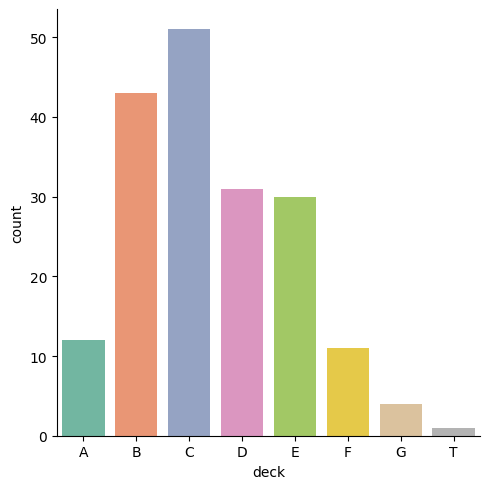

In [78]:
# Create a categorical plot of 'deck', with the x labels ordered alphabetically
sns.catplot(x='deck', data=deck_df, kind='count', palette='Set2', order=sorted(deck_df['deck'].unique()))

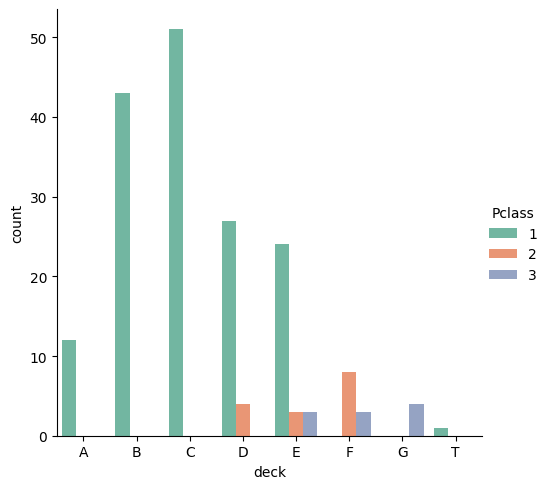

In [79]:
sns.catplot(x='deck',data=deck_df,hue='Pclass',kind='count',palette='Set2',order=sorted(deck_df['deck'].unique()))

It appears that passengers from higher classes were indeed allocated to the upper decks. Decks A, B, and C were exclusively assigned to first-class passengers, and we begin to observe third-class passengers only from deck E onwards. However, it's important to bear in mind that cabin information was unavailable for over three-quarters of our passengers, which could impact the accuracy of our analysis.

#### What were the origins of the Titanic passengers, i.e., where did they embark from?

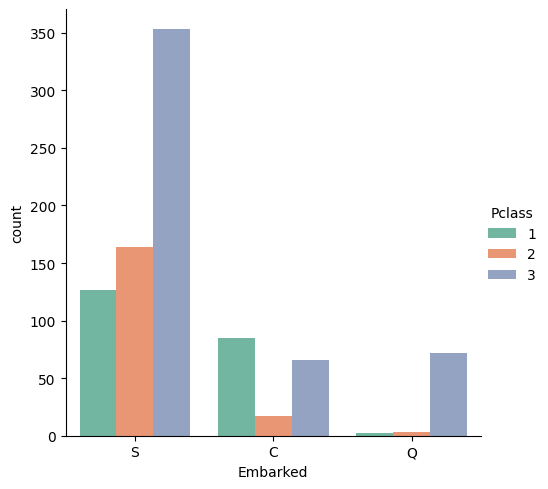

In [80]:
sns.catplot(x='Embarked',data=train_df,hue='Pclass',kind='count',palette='Set2')

The majority of passengers embarked from Southampton, including the iconic characters Jack and Rose from the movie. Additionally, it's intriguing to note that almost no first or second-class passengers embarked from Queenstown. This observation could provide insights into the socio-economic status of Queenstown's population at the time.

#### What was the distribution of passengers in terms of traveling alone versus with family members?

We can simplify our analysis by creating a new column to represent whether a passenger had any family members onboard. 

We can achieve this by combining the "SibSp" (number of siblings/spouses) and "Parch" (number of parents/children) attributes. If the total count of siblings/spouses and parents/children is greater than zero, we'll indicate that the passenger had family onboard; otherwise, we'll mark them as traveling alone.

In [82]:
# Adding the number of family a passenger had onboard

train_df['Alone'] = train_df.SibSp + train_df.Parch

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [83]:
train_df['Alone'].loc[train_df['Alone']>0] = 'No'

train_df['Alone'].loc[train_df['Alone']==0] = 'Yes'

C:\Users\mar27\AppData\Local\Temp\ipykernel_19116\2937471095.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df['Alone'].loc[train_df['Alone']>0] = 'No'
C:\Users\mar27\AppData\Local\Temp\ipykernel_19116\2937471095.py:1: SettingWith

In [84]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes


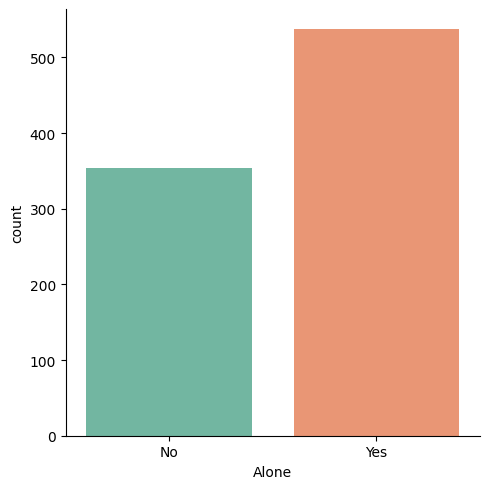

In [86]:
sns.catplot(x='Alone',data=train_df,kind='count',palette='Set2')

With the data now simplified, it's clear that a large number of passengers aboard the ship had family members accompanying them. The next step is to investigate whether this factor influenced their chances of survival. We'll delve into this question in the upcoming section.

#### Which factors played a significant role in determining the survival of passengers during the Titanic sinking?

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

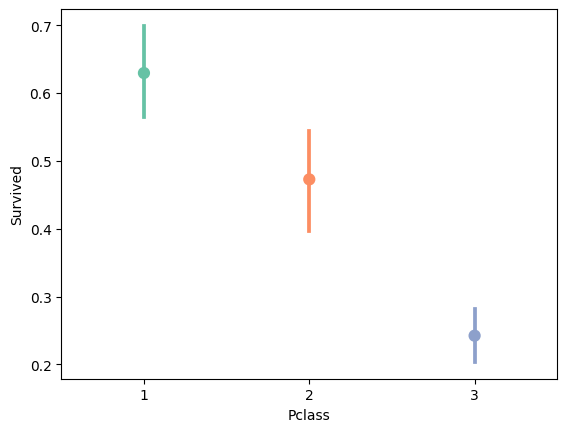

In [89]:
sns.pointplot(x='Pclass', y='Survived', data=train_df, palette='Set2')

It's unsurprising to note that lower-class passengers had a lower chance of survival. However, considering that there were more men than women or children in the third class, it prompts us to investigate further. Referring to the protocol of 'Women and children first!' depicted in the movie 'Titanic,' let's examine if this principle was evident in reality. We can achieve this by using the 'Person' column as the hue in the factor plot.

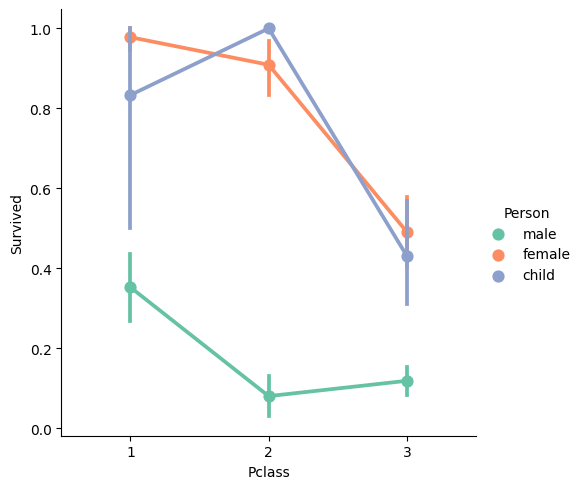

In [90]:
sns.catplot(x='Pclass',y='Survived',hue='Person',data=train_df, kind='point', palette='Set2')

Indeed, the factor plot confirms our suspicion that men had lower chances of survival compared to women and children, likely due to their lower priority in being saved.

Moreover, it's evident that passengers belonging to the third class generally had a lower chance of survival compared to those in the first class, regardless of gender or age.

Now, let's explore whether there's a relationship between age and survival.

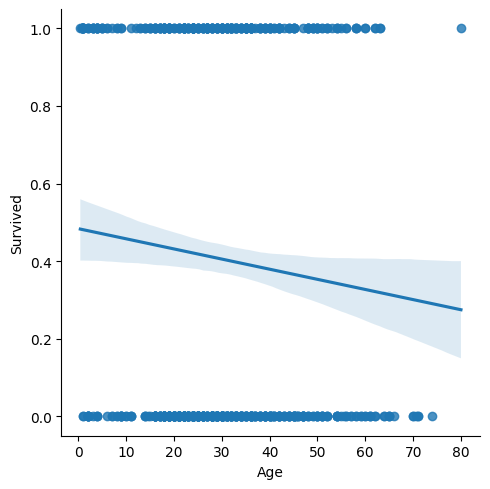

In [93]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set2')

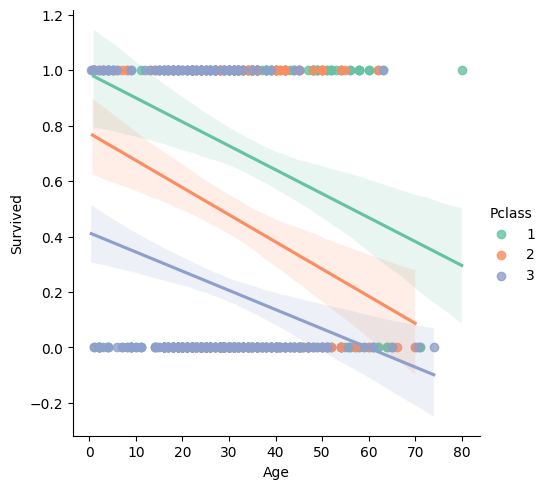

In [94]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=train_df,palette='Set2')

C:\Users\mar27\AppData\Local\Temp\ipykernel_19116\1390951478.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='Survived',y='Alone',data=train_df,palette='Set2')
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mar27\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_g

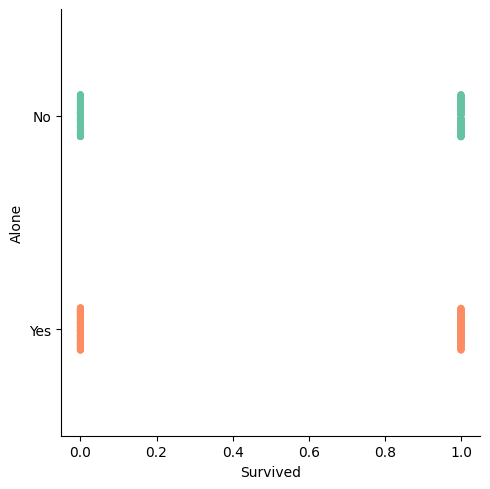

In [95]:
sns.catplot(x='Survived',y='Alone',data=train_df,palette='Set2')

Certainly, it's evident that having someone known onboard increased the chances of survival, highlighting the importance of companionship during such distressing situations.

Expanding on this project, we can explore running machine learning algorithms on the data, both on the original dataset and with the modifications we've made. By doing so, we can attempt to develop a model that accurately predicts the survival of a passenger based on various attributes.